Evaluation Metrics:
      Metric     Score
0   Accuracy  0.956140
1  Precision  0.934211
2     Recall  1.000000
3   F1 Score  0.965986


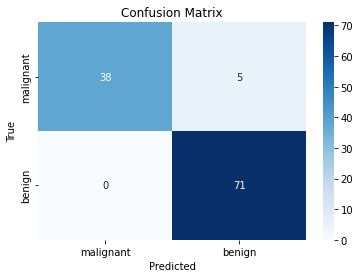

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
class_names = data.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Display the evaluation metrics in a table
metrics_data = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                'Score': [accuracy, precision, recall, f1]}
metrics_df = pd.DataFrame(metrics_data)
print("Evaluation Metrics:")
print(metrics_df)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
class_names = data.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train[:20])


In [3]:

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_reduced, y_train[:20])



KNeighborsClassifier(n_neighbors=2)

In [4]:
# Define the meshgrid for the decision boundaries
h = 0.2  # step size in the mesh
x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
# Predict the labels for all points in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train[:20], cmap='coolwarm', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries')
plt.colorbar(label='Class')
plt.tight_layout()
plt.show()
